# Introduction to DBnomics in Python

This tutorial explains how to obtain economic [time series](https://en.wikipedia.org/wiki/Time_series) from [DBnomics](https://next.nomics.world/), how to manipulate them and how to visualize them.

We will use well-known Python packages to achieve our goal, like [Pandas](http://pandas.pydata.org/) to represent tabular data, and [Altair](https://altair-viz.github.io/) to create the charts.

We will also use the `dbnomics` Python package to obtain data from the DBnomics Web API.

First, let's import those libraries:

In [1]:
import pandas as pd
import altair as alt
from altair import Chart, Scale, Y
# alt.enable_mime_rendering()  # Uncomment if you use Jupyter Lab

from dbnomics import fetch_series, fetch_series_by_api_link

Note: in this notebook we are going to follow the conventions of the Scientific Python community. In particular, the `df` shortcut for `DataFrame`.

# Fetch one time series by its code

First, let's assume that we know which series we want to download. A series identifier (ID) is defined by three values, formatted like this: `provider_code/dataset_code/series_code`. We can use the `fetch_series` function, previously imported from the `dbnomics` Python package.

For example, to fetch the time series `EA19.1.0.0.0.ZUTN` from the ["Unemployment rate" [ZUTN] dataset](https://next.nomics.world/AMECO/ZUTN) belonging to the [AMECO provider](https://next.nomics.world/AMECO):

In [2]:
df1 = fetch_series('AMECO/ZUTN/EA19.1.0.0.0.ZUTN')

The returned data is stored in the `df1` variable. Its type is a [Pandas](http://pandas.pydata.org/) [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

Now let's display the first rows of this `DataFrame` by using the `head` method, each row representing an observation of the time series:

In [3]:
df1.head()

,Country,Frequency,Unit,dataset_code,dataset_name,freq,geo,period,provider_code,series_code,series_name,unit,value
0,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1960,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA
1,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1961,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA
2,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1962,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA
3,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1963,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA
4,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1964,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA


In such `DataFrame`, you will always find at least seven columns:
- provider_code
- dataset_code
- dataset_name
- series_code
- series_name
- period
- value

The other columns depend on the provider and on the dataset. They always come in pairs (for the code and the name). In `df1`, you have:
- `unit` (code) and `Unit` (name) 
- `geo` (code) and `Country` (name)
- `freq` (code) and `Frequency` (name)

To plot the `DataFrame`, we need to:

- clean the missing values (`NA`),
- convert the "value" column to `float`.

Note: DBnomics defines a unified `NA` value for missing values.

For example, the following `clean_dataframe` helper function:

In [4]:
def clean_dataframe(df):
    clean_df = df.query("value != 'NA'")
    clean_df.value = pd.to_numeric(clean_df.value)
    return clean_df

Clean the previously downloaded `df1` `DataFrame`:

In [5]:
df1_clean = clean_dataframe(df1)
df1_clean.head()

/home/cbenz/.local/share/virtualenvs/dbnomics-python/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Country,Frequency,Unit,dataset_code,dataset_name,freq,geo,period,provider_code,series_code,series_name,unit,value
38,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1998,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,10.4
39,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1999,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,9.7
40,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,2000,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,8.9
41,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,2001,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,8.3
42,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,2002,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,8.6


Here we use the [Altair](https://altair-viz.github.io/) library to render charts, but you can use any other one like matplotlib, bqplot, plotly, etc.

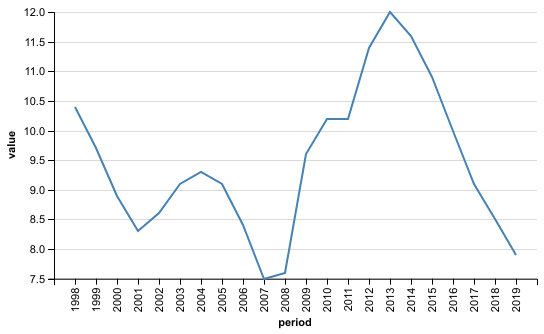

In [6]:
chart = Chart(df1_clean).mark_line().encode(
    x='period',
    y=Y('value', scale=Scale(zero=False)),
)
chart

# Fetch two time series by their codes

Again, let's assume that we know which series we want to download. We can reuse the `fetch_series` function, this time with two series codes.

For example, to fetch the time series `EA19.1.0.0.0.ZUTN` and `DNK.1.0.0.0.ZUTN` from the ["Unemployment rate" [ZUTN] dataset](https://next.nomics.world/AMECO/ZUTN) belonging to the [AMECO provider](https://next.nomics.world/AMECO):

In [7]:
df2 = fetch_series([
    'AMECO/ZUTN/EA19.1.0.0.0.ZUTN',
    'AMECO/ZUTN/DNK.1.0.0.0.ZUTN',
])
df2.head()

,Country,Frequency,Unit,dataset_code,dataset_name,freq,geo,period,provider_code,series_code,series_name,unit,value
0,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1960,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA
1,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1961,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA
2,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1962,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA
3,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1963,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA
4,Euro area,Annually,(Percentage of active population),ZUTN,Unemployment rate: total :- Member States: def...,a,ea19,1964,AMECO,EA19.1.0.0.0.ZUTN,Euro area,percentage-of-active-population,NA


/home/cbenz/.local/share/virtualenvs/dbnomics-python/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


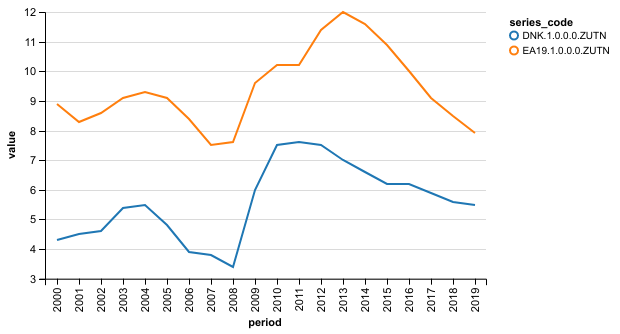

In [8]:
range_df = clean_dataframe(df2).query("period >= '2000'")
chart = Chart(range_df).mark_line().encode(
    x='period',
    y=Y('value', scale=Scale(zero=False)),
    color='series_code',
)
chart

## Fetch time series by their dimensions

When you don't know the codes of the series, you can give a `dict` of dimensions to the `fetch_series` function, and it will return a `DataFrame` containing all the matching series. Here you must know the provider code, the dataset code, and the codes of the dimensions.

For example, to fetch:
- many series
- from the ["Doing Business" [DB]](https://next.nomics.world/WB/DB) dataset of the [World Bank](https://next.nomics.world/WB) provider
- searching for time series about France, Italy and Spain (`country` dimension)
- and searching for the indicator "Procedures required to start a business - Women (number)" (`indicator` dimension):

In [9]:
df3 = fetch_series("WB", "DB", dimensions={
    "country": ["FR", "IT", "ES"],
    "indicator": ["IC.REG.PROC.WOMEN"],
})
df3.head()

,country,country_label,dataset_code,dataset_name,indicator,indicator_label,period,provider_code,series_code,series_name,value
0,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2003,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,8
1,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2004,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,5
2,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2005,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,5
3,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2006,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,5
4,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2007,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,5


To know the codes of the time series you got:

In [10]:
df3.series_code.unique().tolist()

['IC.REG.PROC.WOMEN-FR', 'IC.REG.PROC.WOMEN-IT', 'IC.REG.PROC.WOMEN-ES']

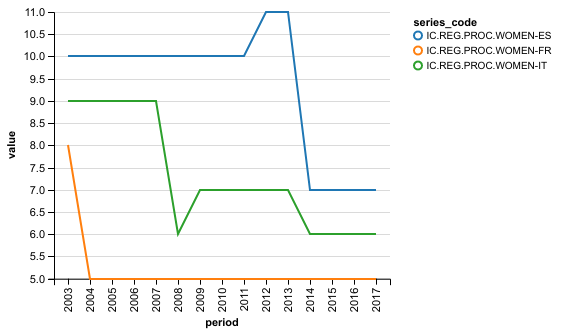

In [11]:
chart = Chart(clean_dataframe(df3)).mark_line().encode(
    x='period',
    y=Y('value', scale=Scale(zero=False)),
    color='series_code',
)
chart

## Fetch time series found on the web site

When you don't know the codes of the dimensions, provider, dataset or series, you can:

- go to the page of a dataset on DBnomics website, for example [Doing Business](https://next.nomics.world/WB/DB),
- select some dimensions by using the input widgets of the left column,
- click on "Copy API link" in the menu of the "Download" button,
- use the `fetch_series_by_api_link` function such as below.

In [12]:
df4 = fetch_series_by_api_link("https://api.next.nomics.world/series?dimensions=%7B%22country%22%3A%5B%22FR%22%2C%22IT%22%2C%22ES%22%5D%2C%22indicator%22%3A%5B%22IC.REG.PROC.WOMEN%22%5D%7D&provider_code=WB&dataset_code=DB")
df4.head()

,country,country_label,dataset_code,dataset_name,indicator,indicator_label,period,provider_code,series_code,series_name,value
0,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2003,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,8
1,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2004,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,5
2,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2005,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,5
3,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2006,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,5
4,FR,France,DB,Doing Business,IC.REG.PROC.WOMEN,Procedures required to start a business - Wome...,2007,WB,IC.REG.PROC.WOMEN-FR,Procedures required to start a business - Wome...,5


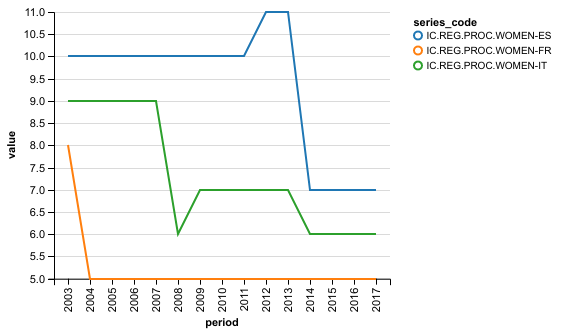

In [13]:
chart = Chart(clean_dataframe(df4)).mark_line().encode(
    x='period',
    y=Y('value', scale=Scale(zero=False)),
    color='series_code',
)
chart

The chart is exactly the same than the previous one.

## Fetch time series from the cart

On the [cart page](https://next.nomics.world/cart) of the DBnomics website, click on "Copy API link" and copy-paste it as an argument of the `fetch_series_by_api_link` function.

Please note that when you update your cart, you have to copy this link again, because the link itself contains the IDs of the series in the cart.

In [14]:
cart_df = fetch_series_by_api_link("https://api.next.nomics.world/series?series_ids=BOE%2F8745%2FLPMB23A%2CBOE%2F8745%2FLPMB26A")
cart_df.head()

,dataset_code,dataset_name,period,provider_code,series_code,series_name,value
0,8745,Monthly lending secured on dwellings: approvals,1999-01-31,BOE,LPMB23A,Monthly number of other specialist lenders' st...,939
1,8745,Monthly lending secured on dwellings: approvals,1999-02-28,BOE,LPMB23A,Monthly number of other specialist lenders' st...,1571
2,8745,Monthly lending secured on dwellings: approvals,1999-03-31,BOE,LPMB23A,Monthly number of other specialist lenders' st...,2091
3,8745,Monthly lending secured on dwellings: approvals,1999-04-30,BOE,LPMB23A,Monthly number of other specialist lenders' st...,1857
4,8745,Monthly lending secured on dwellings: approvals,1999-05-31,BOE,LPMB23A,Monthly number of other specialist lenders' st...,1867


## Fetch series using a code mask

In [15]:
code_mask_df = fetch_series("IMF", "CPI", code_mask="M.FR+DE.PCPIEC_IX+PCPIA_IX")
code_mask_df = clean_dataframe(code_mask_df).query("period >= '2000' and period < '2002'")
code_mask_df.head()

/home/cbenz/.local/share/virtualenvs/dbnomics-python/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,FREQ,Frequency,INDICATOR,Indicator,REFERENCE_PERIOD,REF_AREA,Reference Area,dataset_code,dataset_name,period,provider_code,series_code,series_name,value
120,M,Monthly,PCPIA_IX,Clothing and footwear,2015A,FR,France,CPI,Consumer Price Index (CPI),2000-01,IMF,M.FR.PCPIA_IX,Monthly – France – Clothing and footwear,91.36
121,M,Monthly,PCPIA_IX,Clothing and footwear,2015A,FR,France,CPI,Consumer Price Index (CPI),2000-02,IMF,M.FR.PCPIA_IX,Monthly – France – Clothing and footwear,89.44
122,M,Monthly,PCPIA_IX,Clothing and footwear,2015A,FR,France,CPI,Consumer Price Index (CPI),2000-03,IMF,M.FR.PCPIA_IX,Monthly – France – Clothing and footwear,94.27
123,M,Monthly,PCPIA_IX,Clothing and footwear,2015A,FR,France,CPI,Consumer Price Index (CPI),2000-04,IMF,M.FR.PCPIA_IX,Monthly – France – Clothing and footwear,94.60
124,M,Monthly,PCPIA_IX,Clothing and footwear,2015A,FR,France,CPI,Consumer Price Index (CPI),2000-05,IMF,M.FR.PCPIA_IX,Monthly – France – Clothing and footwear,94.49


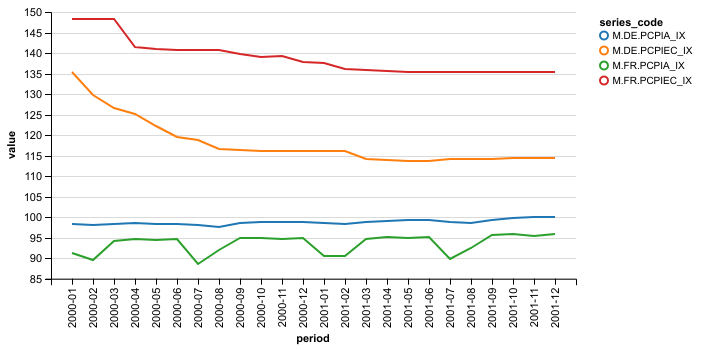

In [16]:
chart = Chart(code_mask_df).mark_line().encode(
    x='period',
    y=Y('value', scale=Scale(zero=False)),
    color='series_code',
)
chart